In [3]:
!ls

CONTRIBUTING.md      custom_yolov5s.yaml  requirements.txt  utils
Dockerfile	     data		  runs		    val.py
LICENSE		     data.yaml		  setup.cfg	    valid
README.dataset.txt   detect.py		  test		    yolov5s.pt
README.md	     export.py		  train
README.roboflow.txt  hubconf.py		  train.py
__pycache__	     models		  tutorial.ipynb


In [4]:
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
# %pip install -qr requirements.txt  # install

In [5]:
import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-22-g6dd82c0 torch 1.10.2 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (6 CPUs, 54.9 GB RAM, 59.4/118.1 GB disk)


In [6]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.10.2 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 398578004405289661
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11319115776
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13836279971246108577
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [2]:
!ls

 roboflow.zip   valid		   yolov5
 test	        yolo.html	  'yolov5 for anki dataset.ipynb.amltmp'
 tox-demo       yolo.html.amltmp   yolov5s.pt
 train	        yolo.ipynb


In [ ]:
# !curl -L "https://public.roboflow.com/ds/pDNZZrmMRc?key=rPjNXNeyPh" -o roboflow.zip; unzip roboflow.zip -d "./yolov5/";

In [3]:
%cd ./yolov5

/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmgpu01/code/Users/memasanz/yolov5


In [4]:
%%writefile ./data.yaml

train: train/images
val: valid/images

nc: 1
names: ['vector']

Overwriting ./data.yaml


In [5]:
%%writefile ./custom_yolov5s.yaml

# parameters
nc: 1  # number of classes  # CHANGED HERE
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Overwriting ./custom_yolov5s.yaml


In [6]:
!python train.py --img 640 --batch 16 --epochs 3 --data data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 1118, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 1118 (delta 301), reused 294 (delta 292), pack-reused 812
Receiving objects: 100% (1118/1118), 302.28 KiB | 488.00 KiB/s, done.
Resolving deltas: 100% (829/829), completed with 46 local objects.
From https://github.com/ultralytics/yolov5
   6dd82c0..c94736a  master               -> orig

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         61         55      0.529       0.49      0.457      0.112
Results saved to runs/train/exp9
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f4274904400>>
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 1258, in _shutdown_workers
AttributeError: 'NoneType' object has no attribute 'python_exit_status'
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f42749bd8d0>>
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/dat

In [7]:
experiments = !ls './runs/train/'
print(experiments)
print(experiments[-1])

['exp', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6', 'exp7', 'exp8', 'exp9']
exp9


GROUND TRUTH TRAINING DATA:


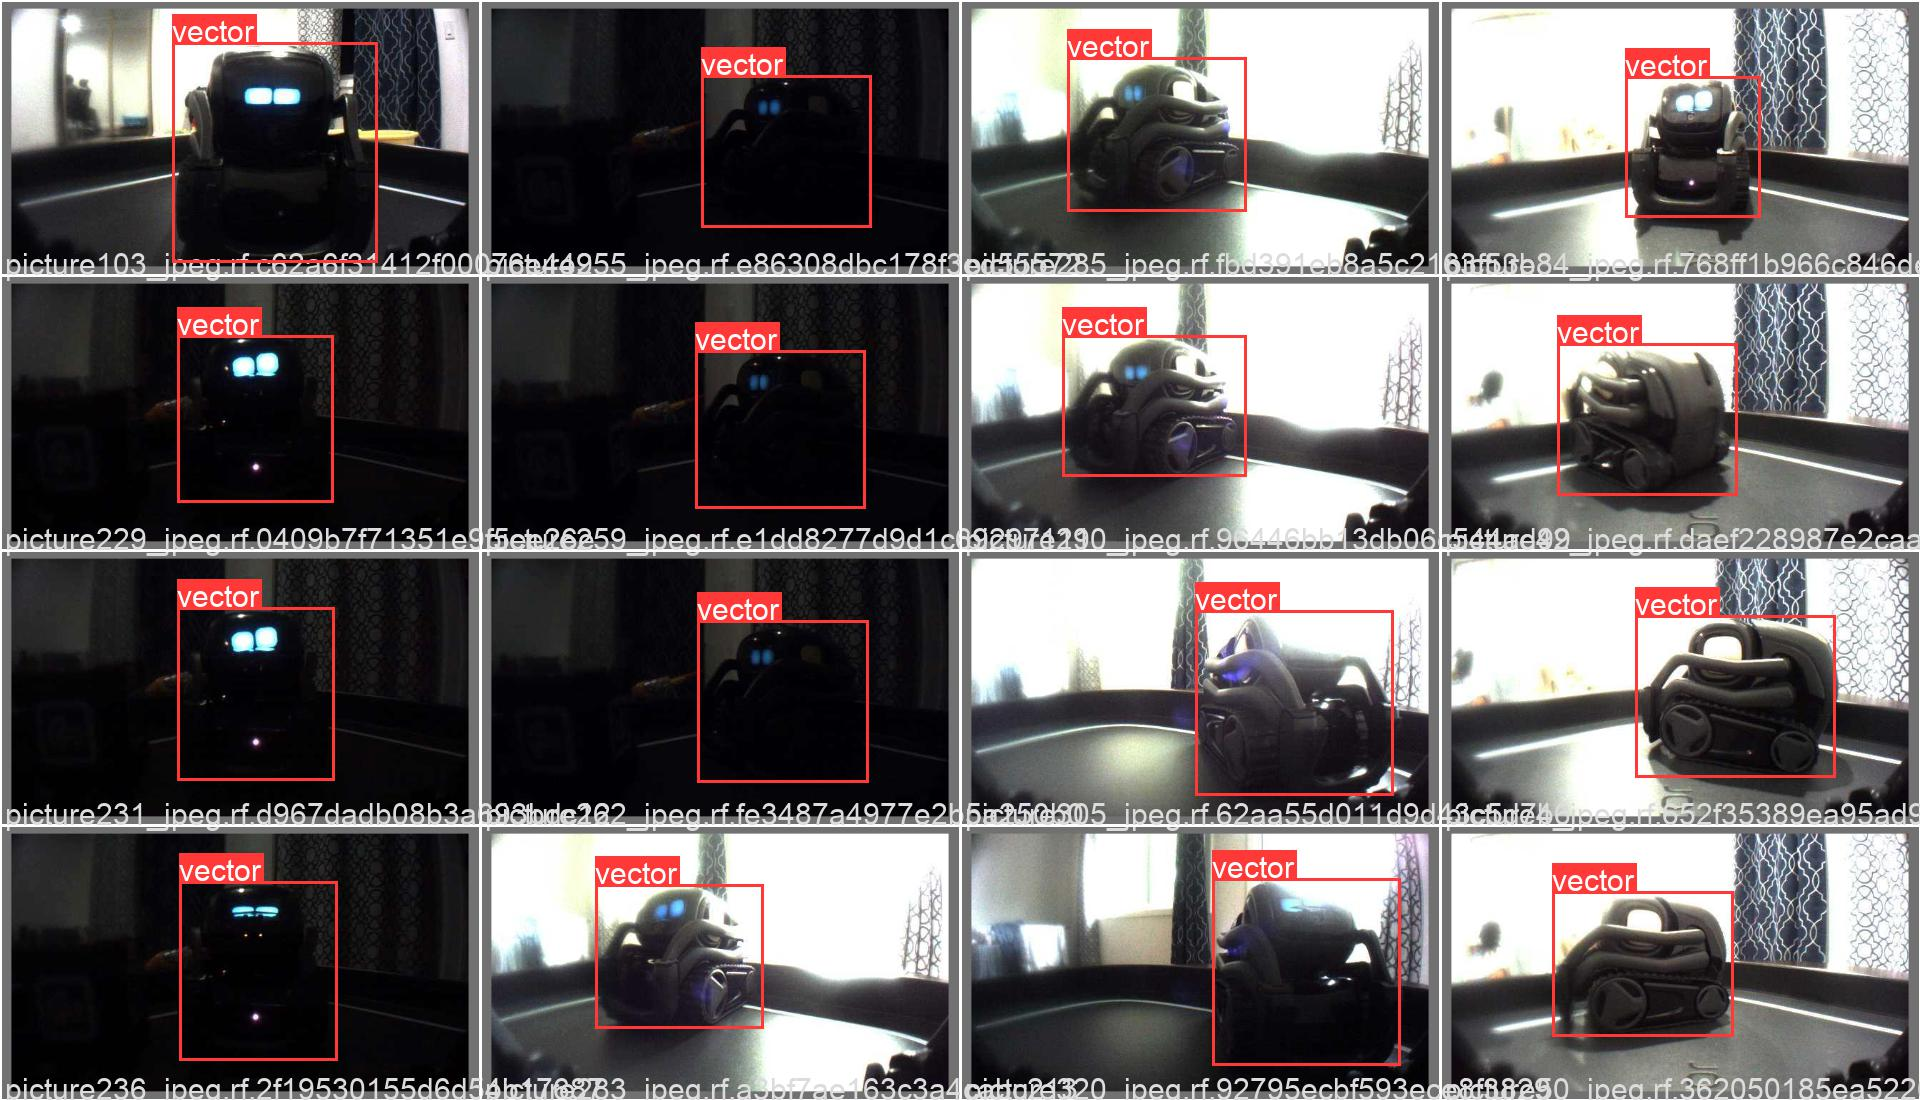

In [8]:
print("GROUND TRUTH TRAINING DATA:")
from utils.plots import plot_results
from IPython.display import Image, clear_output  # to display images
Image(filename='./runs/train/' + experiments[-1] +  '/val_batch0_labels.jpg', width=900)
#!ls ./runs/train/exp7/val_batch0_labels.jpg

In [9]:
import pandas as pd
df = pd.read_csv('./runs/train/' + experiments[-1] + '/results.csv')

In [10]:
df

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.108010,0.031438,0,0.046731,...,0.026022,0,0.001300,0.001300,0.088300
1,1,0.078653,0.030495,0,0.486100,...,0.022434,0,0.001809,0.001809,0.074809
2,2,0.072609,0.029524,0,0.491050,...,0.019291,0,0.001394,0.001394,0.060394


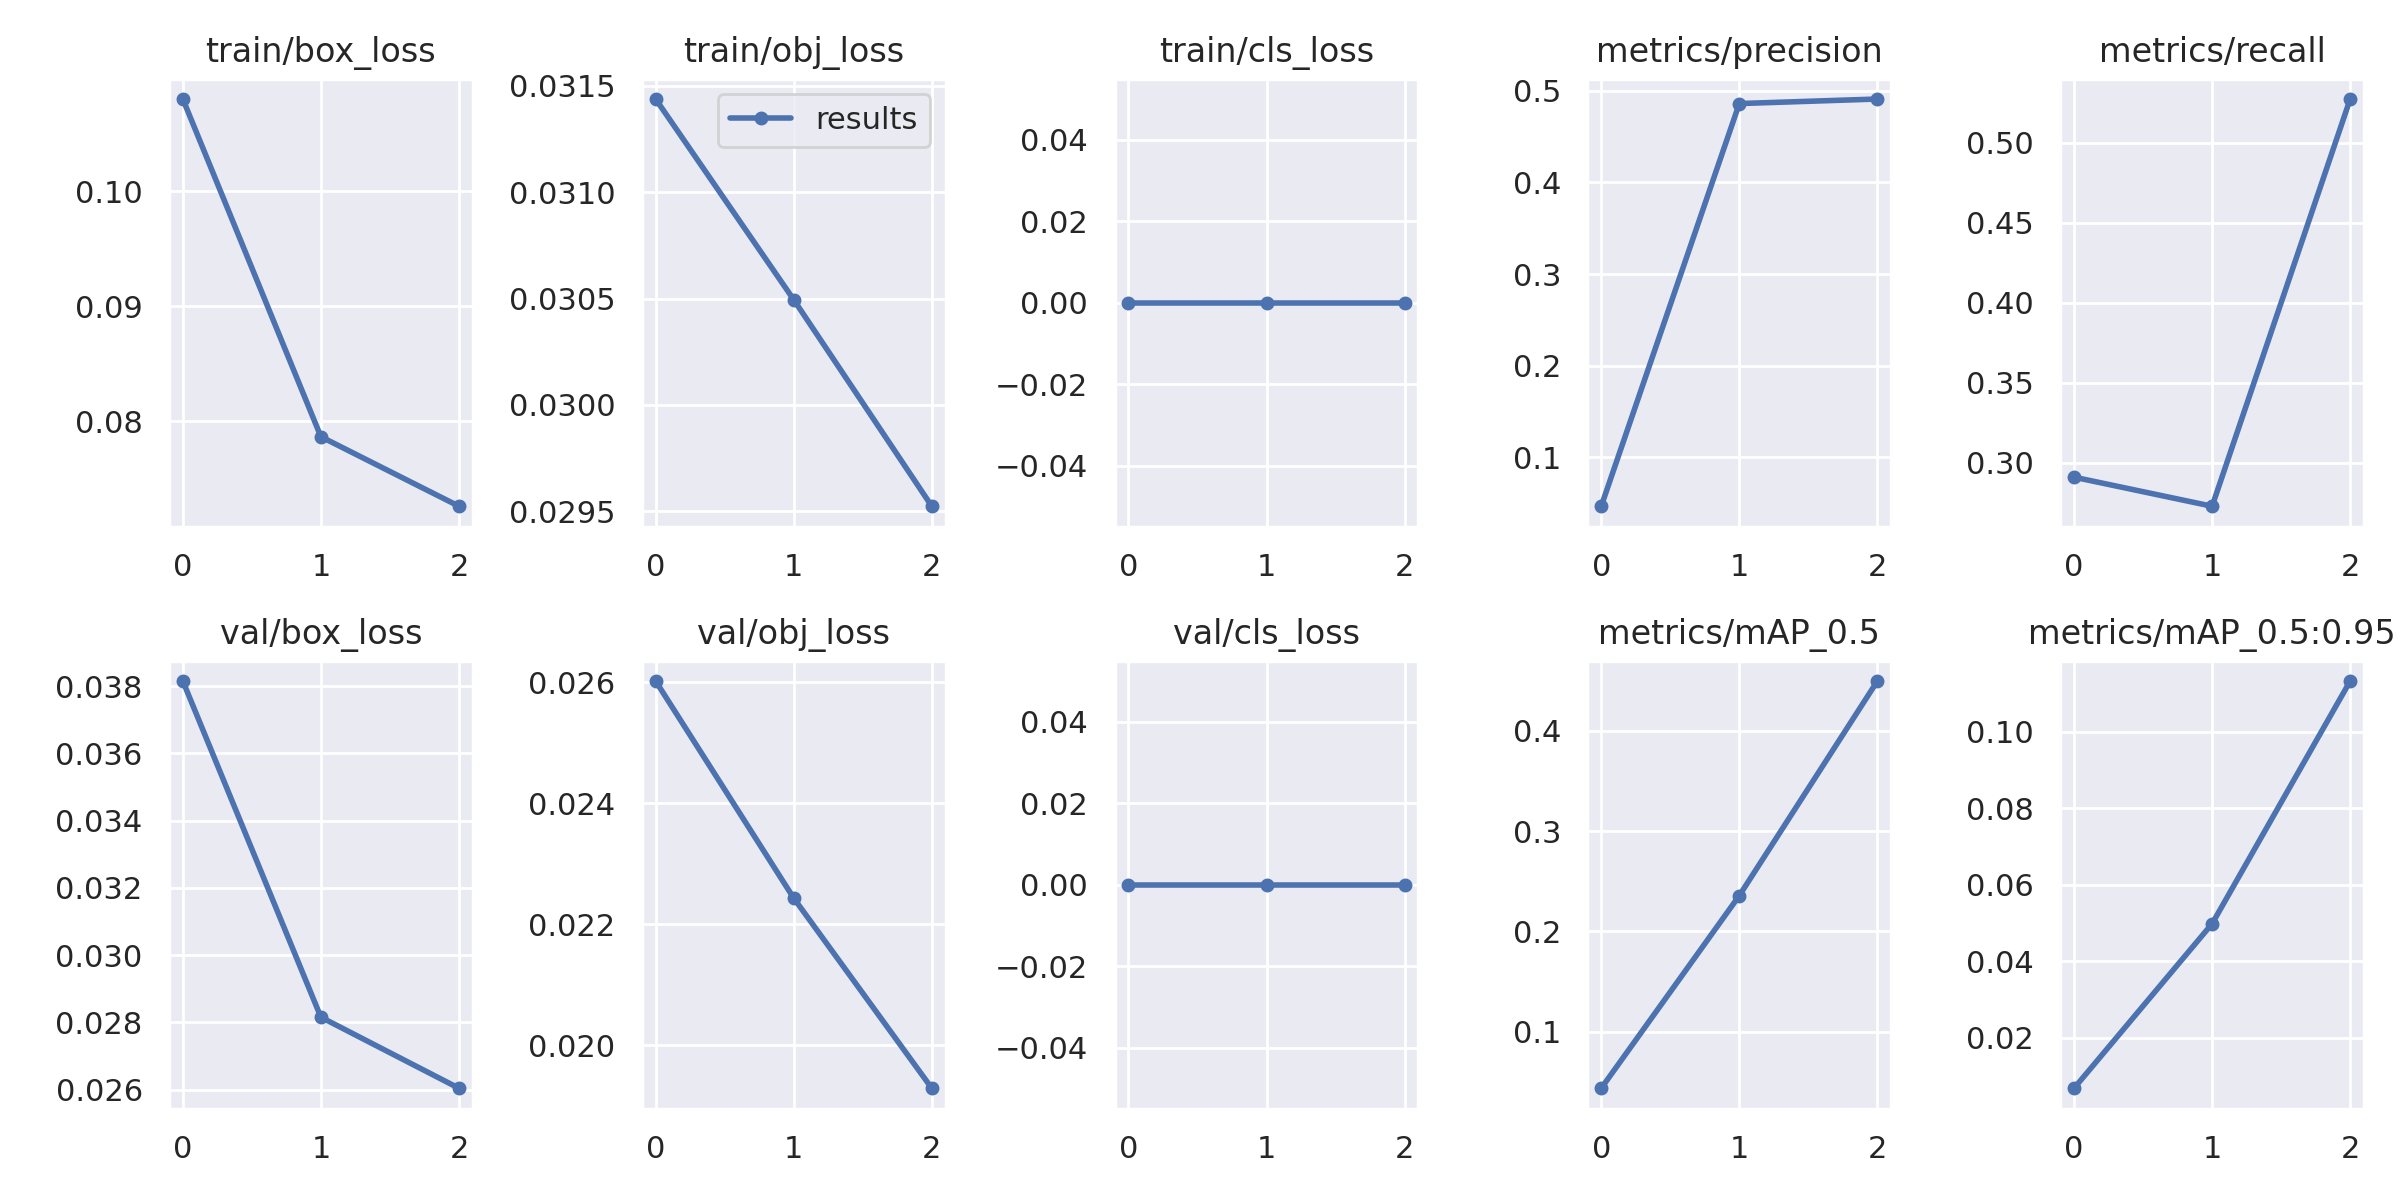

In [11]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='./runs/train/' + experiments[-1] + '/results.png', width=1000)

In [12]:
#!ls ./runs/train/'exp7'/weights
import os
for root, dirs, files in os.walk('./runs/train/' + experiments[-1] + '/weights', topdown=False):
    for name in files:
        print(name)

best.pt
last.pt
